In [1]:
exec(open("../../../python/FNC_init.py").read())

If, instead of $u(1,t)=0$, we were to try to impose the downwind condition $u(0,t)=0$, we only need to change the index of the interior nodes and where to append the zero value.

In [2]:
from scipy.integrate import solve_ivp
m = 80
c = -1
x, Dx, Dxx = FNC.diffmat2(m, [0, 1])
u_init = exp(-80 * (x - 0.5) ** 2)
ode = lambda t, v: -c * chop( Dx @ extend(v) )

In [ ]:
chop = lambda u : u[1:]    # remove left end
extend = lambda v: hstack([0, v])
sol = solve_ivp(ode, (0, 1), chop(u_init), method="RK45", dense_output=True)
u = lambda t: extend(sol.sol(t))

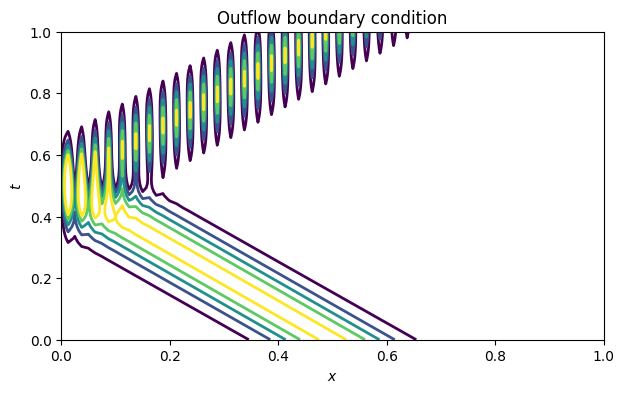

In [3]:
t = linspace(0, 1, 80)
U = [u(tj) for tj in t]
clf
contour(x, t, U, levels=arange(0.15, 1.0, 0.2))
xlabel("$x$"),  ylabel("$t$")
title("Outflow boundary condition");

This time, the solution blows up as soon as the hump runs into the boundary because there are conflicting demands there.

In [4]:
from matplotlib.animation import FuncAnimation
fig, ax = subplots()
curve = ax.plot(x, u_init)[0]
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
ax.set_xlabel("$x$")
ax.set_ylabel("$u(x,t)$")
ax.set_ylim(-0.1, 1.1)
ax.set_title("Advection with outflow BC")
def snapshot(t):
    curve.set_ydata(u(t))
    time_text.set_text(f"t = {t:.2f}")

anim = FuncAnimation(fig, snapshot, frames=linspace(0, 0.5, 51))
anim.save("advection-outflow.mp4", fps=30)
close()